In [1]:
import tables
import numpy as np
import cv2
import os
from tqdm import tqdm
from random import shuffle
import matplotlib.pyplot as plt

In [2]:
dataPath = 'train/'

filename = 'dog_cat.h5'

picShape = (0, 227, 227, 3) # shape of single picture

# 'onehot'
cat = [1, 0]
dog = [0, 1]

In [3]:
files = os.listdir(dataPath)
shuffle(files)

In [4]:
# pal: -1 (RGBA); 0 (grayscale); 1 (RGB)
def loadAndResize(imgPath, *, size=64, pal=1, fill=True):
    img = cv2.imread(imgPath, pal)
    if img is None:
        raise FileNotFoundError(f'File "{imgPath}" not found.')
    if fill:
        shape = np.shape(img)
        if shape[0] > shape[1]:
            bSize = int((shape[0] - shape[1])/2)
            img = cv2.copyMakeBorder(img,0,0,bSize,bSize,cv2.BORDER_CONSTANT,value=[0,0,0])
        else:
            bSize = int((shape[1] - shape[0])/2)
            img = cv2.copyMakeBorder(img,bSize,bSize,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
    if pal != 0:
        return cv2.cvtColor(cv2.resize(img, (size, size)), cv2.COLOR_BGR2RGB)
    else: 
        return cv2.resize(img, (size, size))

In [5]:
filesTrain = files[:20000]
filesTest = files[20000:]

In [6]:
labelsTrain = [cat if 'cat' in adr else dog for adr in filesTrain]
labelsTest = [cat if 'cat' in adr else dog for adr in filesTest]


with tables.open_file(filename, mode='w') as f:
    atom = tables.UInt8Atom()

    picTrain = f.create_earray(f.root, 'picTrain', atom, shape=picShape)
    picTest = f.create_earray(f.root, 'picTest', atom, shape=picShape)

    # append labels
    f.create_array(f.root, 'labTrain', labelsTrain)
    
    f.create_array(f.root, 'labTest', labelsTest)
    
    # append pictures
    for file in tqdm(filesTrain):
        imgPath = dataPath+file
        img = loadAndResize(imgPath, size=227, pal=1, fill=True)
        picTrain.append(img[None])
        
    for file in tqdm(filesTest):
        imgPath = dataPath+file
        img = loadAndResize(imgPath, size=227, pal=1, fill=True)
        picTest.append(img[None])

100%|██████████| 5000/5000 [01:39<00:00, 50.15it/s]


[0, 1]


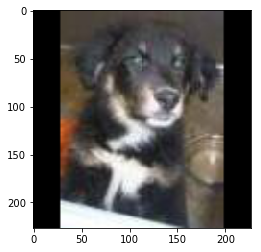

In [17]:
with tables.open_file(filename, mode='r') as f:
    i = 94
    plt.imshow(f.root.picTrain[i])
    print (f.root.labTrain[i])
    plt.show()

[1, 0]


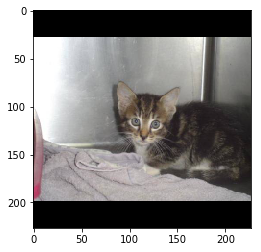

In [16]:
with tables.open_file(filename, mode='r') as f:
    i = 42
    plt.imshow(f.root.picTest[i])
    print (f.root.labTest[i])
    plt.show()